<IPython.core.display.Javascript object>


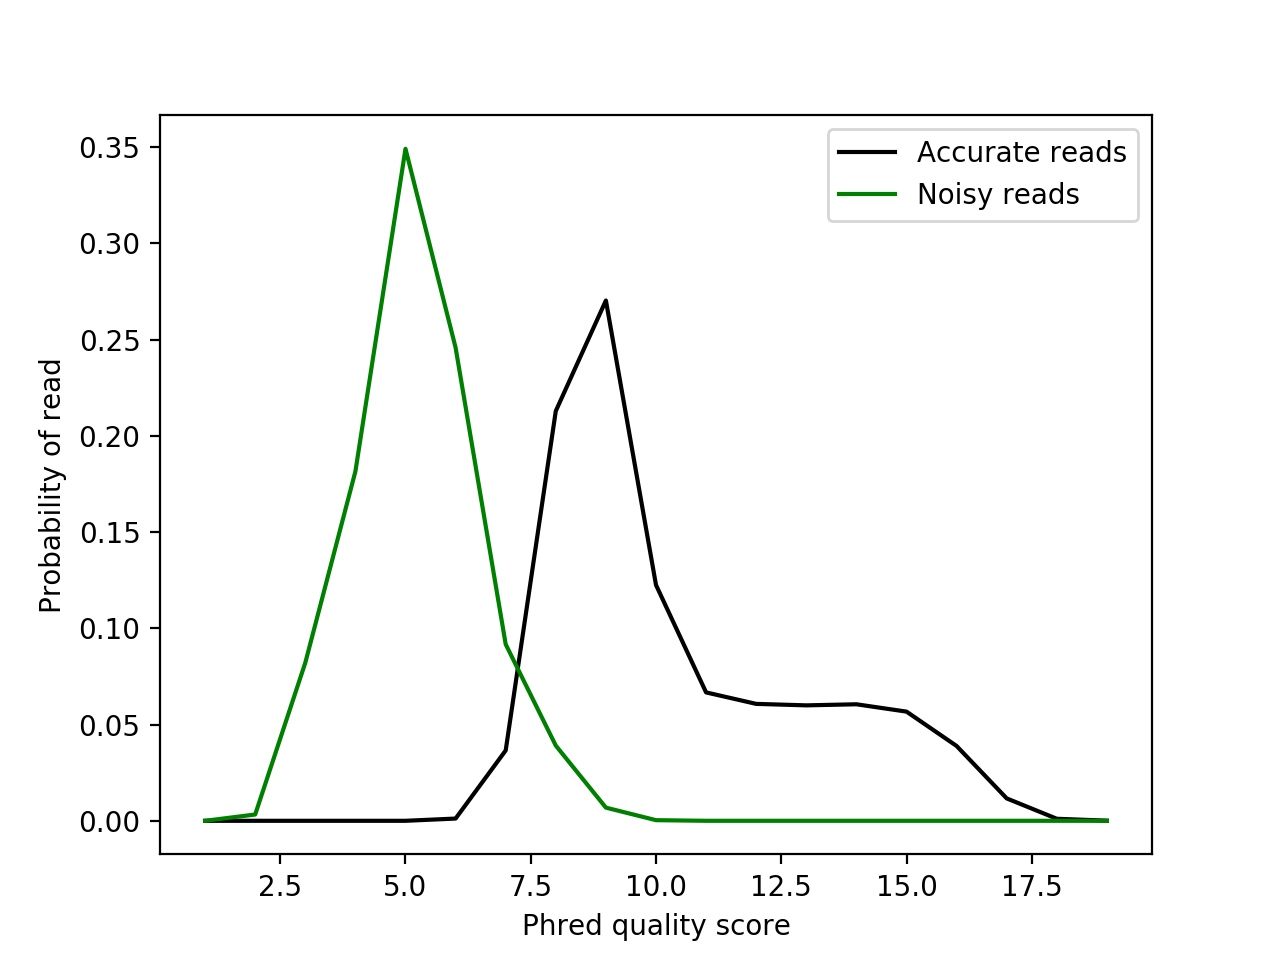

/Users/nataliapahlavan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


In [1]:
#ALL IMPORTS HERE
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


#lists for misaliged read qualities.
data_Low=[] #quality score list for misaligned reads
pscore_low=[] # list of mean read quality scores for misaligned reads
dist_low=[] # read quality distribution for misaligned reads

#LOAD QUALITY SCORES FOR MISALIGNED READS
with open("noisy") as f:
    l=f.readlines()
    l=[i.strip("\n") for i in l]
    l=[i.strip("@[") for i in l]
    l=[i.strip("]") for i in l]
    l=[j.split(",") for j in l]
    
for i in range(len(l)):
    l[i]=[int(j) for j in l[i]]
    pscore_low.append(round(sum(l[i])/len(l[i])))
data_low=l


for i in range(1,20):
 dist_low.append(pscore_low.count(i))

#normalize to get probability
s=sum(dist_low)
dist_low=[i/s for i in dist_low]

#lists for correctly aligned read qualities.
data_hi=[] #quality score list for correctly aligned reads
pscore_hi=[]# list of mean read quality scores for correctly aligned reads
dist_hi=[]# read quality distribution for correctly aligned reads

#LOAD QUALITY SCORES FOR CORRECTLY ALIGNED READS
with open("accurate") as f:
    l=f.readlines()
    l=[i.strip("\n") for i in l]
    l=[i.strip("@[") for i in l]
    l=[i.strip("]") for i in l]
    l=[j.split(",") for j in l]
for i in range(len(l)):
    l[i]=[int(j) for j in l[i]]
    pscore_hi.append(round(sum(l[i])/len(l[i])))
data_hi=l


for i in range(1,20):
 dist_hi.append(pscore_hi.count(i))

s=sum(dist_hi)
dist_hi=[i/s for i in dist_hi]
    
plt.plot(range(1,20), dist_hi, color='k',label='Accurate reads')
plt.plot(range(1,20), dist_low, color='g',label='Noisy reads')
# # plt.xlim([0.0, 1.0])
# # plt.ylim([0.0, 1.05])
plt.xlabel('Phred quality score')
plt.ylabel('Probability of read')
# #plt.title('ROC curve for various decision thresholds')
plt.legend(loc="top right")

plt.show()

X=[] # master list of all unaligned and aligned read's quality scores.
for i in range(len(data_hi)):
    X.append(data_hi[i])
for i in range(len(data_low)):
    X.append(data_low[i])
y=[]# data label
y=[0 for i in data_hi]
for i in range(len(data_low)):
    y.append(1)
    


<IPython.core.display.Javascript object>


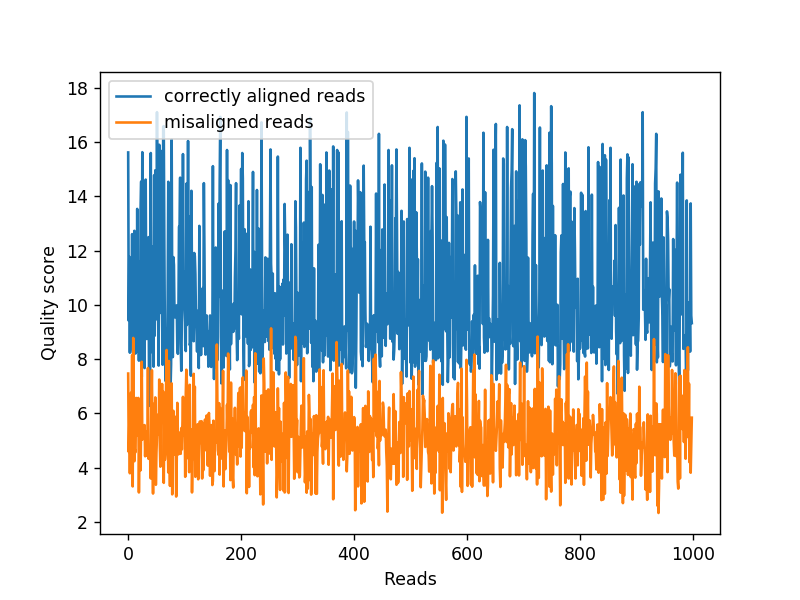

In [29]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt1
import random
%matplotlib notebook

random.shuffle(data_hi)
random.shuffle(data_low)

###Trying to see how the quality scores vary across both classes.
mean_hi=[]
mean_low=[]
for i in range(len(data_hi)):
    mean_hi.append(sum(data_hi[i])/len(data_hi[i]))
for i in range(len(data_low)):
    mean_low.append(sum(data_low[i])/len(data_low[i]))




plt1.plot(mean_hi[1:1000],label="correctly aligned reads")
plt1.plot(mean_low[1:1000],label="misaligned reads")

# ax.set_xlabel('A')
# ax.set_ylabel('M')
# ax.set_zlabel('C')
plt1.xlabel("Reads")
plt1.ylabel("Quality score")
plt1.legend()
plt1.show()

<IPython.core.display.Javascript object>


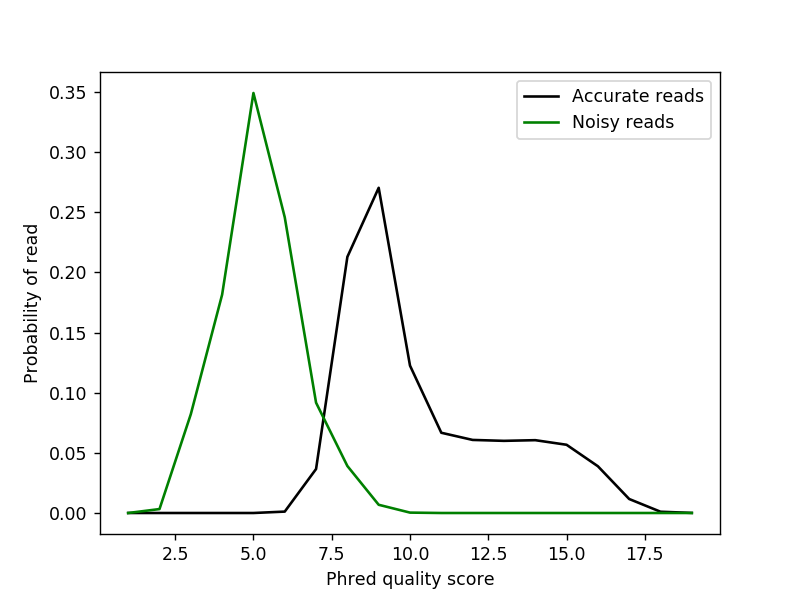

C:\Users\Harisankar Sadasivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


In [26]:
%matplotlib notebook
#misaligned reads have poor quality
plt.plot(range(1,20), dist_hi, color='k',label='Accurate reads')
plt.plot(range(1,20), dist_low, color='g',label='Noisy reads')
# # plt.xlim([0.0, 1.0])
# # plt.ylim([0.0, 1.05])
plt.xlabel('Phred quality score')
plt.ylabel('Probability of read')
# #plt.title('ROC curve for various decision thresholds')
plt.legend(loc="top right")

[[ 8236  2719]
 [  147 10896]]
              precision    recall  f1-score   support

           0       0.98      0.75      0.85     10955
           1       0.80      0.99      0.88     11043

    accuracy                           0.87     21998
   macro avg       0.89      0.87      0.87     21998
weighted avg       0.89      0.87      0.87     21998

